In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cleaning

In [3]:
finance = pd.read_csv("Financial Research Questionnaire.csv")
finance.head()

,Carimbo de data/hora,01 / 13 - Gender,02 / 13 - Whats your age? (only number),03 / 13 - Marital Status:,04 / 13 - Education Level,05 / 13 - Monthly Income (x min wage),06 / 13 - Importance of Financial Education,07 /13 - Source of Financial Education,08 / 13 - Level of Knowledge in the Stock Market,09 / 13 - Financial Planning and Control,10 / 13 - Percentage of Salary Invested,11 / 13 - Types of Investments,12 / 13 - Investment Objectives,13 / 13 - What´s your acceptance of risk in invested capital
0,2023/08/13 2:53:39 PM GMT+1,Female,39 to 55,Married or Living together,Postgraduate Degree,Up to 1 minimum wage,Very important,Family and friends,Medium,Medium (I define my expenses in a basic way),to 10%,Savings account,Retirement,Preserve capital with no risk
1,2023/08/13 2:54:47 PM GMT+1,Male,39 to 55,Married or Living together,Postgraduate Degree,Above 5 minimum wages,Very important,Self-taught,High,Medium (I define my expenses in a basic way),to 30%,Stocks,Retirement,Earn more with low risk
2,2023/08/14 2:35:01 PM GMT+1,Male,24,Married or Living together,Secondary School,1,Very important,Self-taught,1,Medium (I define my expenses in a basic way),NaN,NaN,Retirement;Emergencies,Earn more with low risk
3,2023/08/14 2:35:35 PM GMT+1,Male,32,Single or Living alone,Bachelor´s Degree,3,Slightly important,Self-taught,1,Medium (I define my expenses in a basic way),to 10%,Real estate;crypto,Retirement;Children future,Not afraid to take risks
4,2023/08/14 2:36:08 PM GMT+1,Female,23,Single or Living alone,Bachelor´s Degree,1,Very important,Family and friends,0,Medium (I define my expenses in a basic way),to 10%,Savings account,Other,Earn more with low risk


In [4]:
#Drop the data columm

finance = finance.drop('Carimbo de data/hora',axis=1)

In [5]:
# Drop the first two test rows

finance = finance.drop([0, 1]).reset_index(drop=True)

In [6]:
#Rename the columns

new_columns = {'01 / 13 - Gender':"Gender", '02 / 13 - Whats your age? (only number)':"Age",
       '03 / 13 - Marital Status:':"Marital", '04 / 13 - Education Level':"Education",
       '05 / 13 - Monthly Income (x min wage)':"Salary",
       '06 / 13 - Importance of Financial Education':"Importance",
       '07 /13 - Source of Financial Education':"Source",
       '08 / 13 - Level of Knowledge in the Stock Market':"Knowledge",
       '09 / 13 - Financial Planning and Control':"Control",
       '10 / 13 - Percentage of Salary Invested':"Percentage",
       '11 / 13 - Types of Investments':"Investments", '12 / 13 - Investment Objectives':"Objectives",
       '13 / 13 - What´s your acceptance of risk in invested capital':"Risk"}
finance.rename(columns=new_columns, inplace=True)

In [7]:
finance.columns

Index(['Gender', 'Age', 'Marital', 'Education', 'Salary', 'Importance',
       'Source', 'Knowledge', 'Control', 'Percentage', 'Investments',
       'Objectives', 'Risk'],
      dtype='object')

In [8]:
finance["Gender"].value_counts()

Gender
Male      36
Female    22
Name: count, dtype: int64

In [9]:
finance.head()

,Gender,Age,Marital,Education,Salary,Importance,Source,Knowledge,Control,Percentage,Investments,Objectives,Risk
0,Male,24,Married or Living together,Secondary School,1,Very important,Self-taught,1,Medium (I define my expenses in a basic way),NaN,NaN,Retirement;Emergencies,Earn more with low risk
1,Male,32,Single or Living alone,Bachelor´s Degree,3,Slightly important,Self-taught,1,Medium (I define my expenses in a basic way),to 10%,Real estate;crypto,Retirement;Children future,Not afraid to take risks
2,Female,23,Single or Living alone,Bachelor´s Degree,1,Very important,Family and friends,0,Medium (I define my expenses in a basic way),to 10%,Savings account,Other,Earn more with low risk
3,Male,39,Married or Living together,Master or plus,1,Very important,Family and friends,2,High (I categorize all my expenses),to 10%,Stocks;Savings account,Retirement;Children future;Emergencies;Unemplo...,Preserve capital with no risk
4,Male,23,Single or Living alone,Secondary School,2,Very important,Family and friends,2,Medium (I define my expenses in a basic way),to 10%,Savings account,Retirement;Children future;Emergencies;Unemplo...,Earn more with low risk


In [10]:
#Clean the ages with text

finance['Age'] = finance['Age'].str.extract(r'(\d+)', expand=False)
finance["Age"].unique()

array(['24', '32', '23', '39', '35', '16', '43', '17', '30', '44', '22',
       '29', '42', '45', '34', '27', '25', '31', '52', '75', '47', '73',
       '63', '78', '46', '40', '41', '50', '55', '33', '36', '28', '37'],
      dtype=object)

In [11]:
finance["Investments"].unique()

array([nan, 'Real estate;crypto', 'Savings account',
       'Stocks;Savings account', 'Real estate;Savings account',
       'Stocks;Real estate;Savings account',
       'Real estate;Savings account;Crypto', 'Real estate',
       'private pension', 'Stocks', 'Stocks;Real estate'], dtype=object)

In [12]:
finance["Marital"].unique()

array(['Married or Living together', 'Single or Living alone'],
      dtype=object)

In [13]:
finance["Percentage"].unique()

array([nan, 'to 10%', 'to 30% or more', 'to 20%'], dtype=object)

# GOODNESS OF FIT AND ASSOCIATION TESTING

# Invest x Marital

In [14]:
# Marital / Percentage

#finance.pivot_table(index = "Marital", columns = "Percentage", aggfunc="count").reset_index().T
marital_pivot = finance.pivot_table(index='Percentage', columns='Marital', aggfunc='size', fill_value=0)
marital_pivot


Marital,Married or Living together,Single or Living alone
Percentage,,
to 10%,14,6
to 20%,7,7
to 30% or more,7,4


In [15]:
resultado_marital = marital_pivot.values.tolist()
resultado_marital

[[14, 6], [7, 7], [7, 4]]

In [16]:
## H0: the marital status are independent of the investment
## H1: the marital status are dependent of the investment


alpha = 0.05
st.chi2_contingency(resultado_marital)

Chi2ContingencyResult(statistic=1.4137700534759357, pvalue=0.49317804369524354, dof=2, expected_freq=array([[12.44444444,  7.55555556],
       [ 8.71111111,  5.28888889],
       [ 6.84444444,  4.15555556]]))

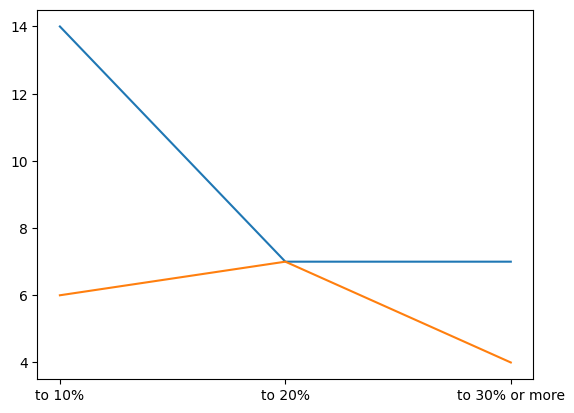

In [17]:
plt.plot(marital_pivot)

# Percentage x Gender

In [18]:
gender_pivot = finance.pivot_table(index = "Percentage", columns = "Gender", aggfunc="size", fill_value=0)
gender_pivot

Gender,Female,Male
Percentage,,
to 10%,4,16
to 20%,9,5
to 30% or more,3,8


In [19]:
resultado_gender = gender_pivot.values.tolist()
resultado_gender

[[4, 16], [9, 5], [3, 8]]

In [20]:
## H0: the gender are independent of the investment
## H1: the gender are dependent of the investment

alpha = 0.05
st.chi2_contingency(resultado_gender)

Chi2ContingencyResult(statistic=7.4846758844603665, pvalue=0.023698632279544475, dof=2, expected_freq=array([[ 7.11111111, 12.88888889],
       [ 4.97777778,  9.02222222],
       [ 3.91111111,  7.08888889]]))

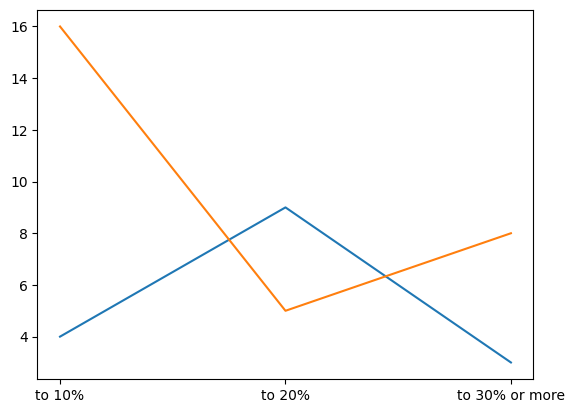

In [21]:
plt.plot(gender_pivot)

# Education x Risk

In [22]:
education_pivot = finance.pivot_table(index = "Education", columns = "Risk", aggfunc="size",fill_value=0)
education_pivot

Risk,Earn more with low risk,I don't intend to invest,Not afraid to take risks,Preserve capital with no risk
Education,,,,
Bachelor´s Degree,7,2,2,4
Master or plus,4,1,4,3
Postgraduate Degree,6,2,1,3
Primary School,0,0,0,1
Secondary School,5,2,3,8


In [23]:
resultado_education = education_pivot.values.tolist()
resultado_education

[[7, 2, 2, 4], [4, 1, 4, 3], [6, 2, 1, 3], [0, 0, 0, 1], [5, 2, 3, 8]]

In [24]:
## H0: the education status are independent of the risk
## H1: the education status are dependent of the risk


alpha = 0.05
st.chi2_contingency(resultado_education)

Chi2ContingencyResult(statistic=7.606008202323991, pvalue=0.8151123019796717, dof=12, expected_freq=array([[5.68965517, 1.81034483, 2.5862069 , 4.9137931 ],
       [4.55172414, 1.44827586, 2.06896552, 3.93103448],
       [4.55172414, 1.44827586, 2.06896552, 3.93103448],
       [0.37931034, 0.12068966, 0.17241379, 0.32758621],
       [6.82758621, 2.17241379, 3.10344828, 5.89655172]]))

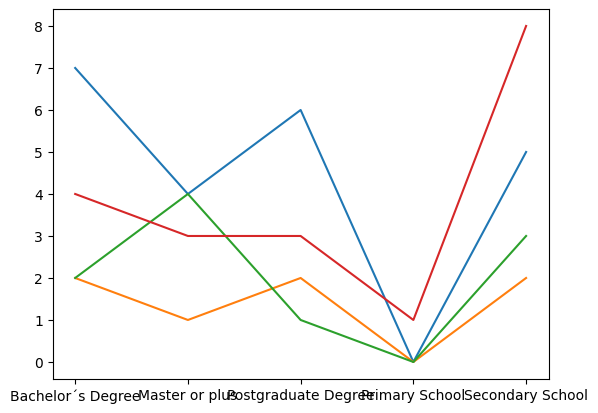

In [25]:
plt.plot(education_pivot)

In [26]:
education_pivot["Risk"] = education_pivot["Earn more with low risk"] + education_pivot["Not afraid to take risks"] + education_pivot["Preserve capital with no risk"]

new_education_pivot = education_pivot[["Risk", "I don't intend to invest"]]
new_education_pivot

Risk,Risk,I don't intend to invest
Education,,
Bachelor´s Degree,13,2
Master or plus,11,1
Postgraduate Degree,10,2
Primary School,1,0
Secondary School,16,2


In [27]:
new_resultado_education = new_education_pivot.values.tolist()
new_resultado_education

[[13, 2], [11, 1], [10, 2], [1, 0], [16, 2]]

In [28]:
## H0: the education status are independent of the investment
## H1: the education status are dependent of the investment

alpha = 0.05
st.chi2_contingency(new_resultado_education)

Chi2ContingencyResult(statistic=0.5722377840024899, pvalue=0.9660981750498169, dof=4, expected_freq=array([[13.18965517,  1.81034483],
       [10.55172414,  1.44827586],
       [10.55172414,  1.44827586],
       [ 0.87931034,  0.12068966],
       [15.82758621,  2.17241379]]))

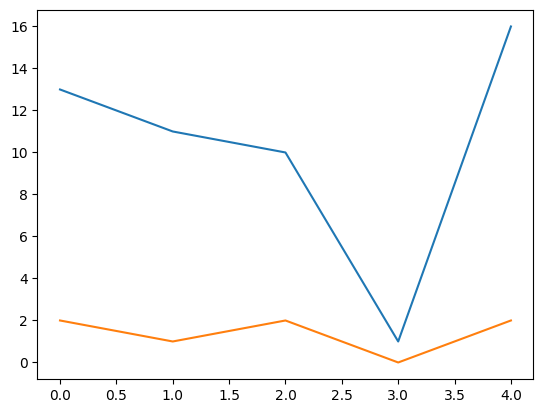

In [29]:
plt.plot(new_resultado_education)

In [30]:
finance_risk = new_education_pivot.reset_index()
finance_risk

Risk,Education,Risk,I don't intend to invest
0,Bachelor´s Degree,13,2
1,Master or plus,11,1
2,Postgraduate Degree,10,2
3,Primary School,1,0
4,Secondary School,16,2


In [31]:
finance_risk["Risk_perc"] = round(finance_risk["Risk"]/finance_risk["Risk"].sum()*100,2)
finance_risk

Risk,Education,Risk,I don't intend to invest,Risk_perc
0,Bachelor´s Degree,13,2,25.49
1,Master or plus,11,1,21.57
2,Postgraduate Degree,10,2,19.61
3,Primary School,1,0,1.96
4,Secondary School,16,2,31.37


In [32]:
finance_risk["No Invest"] = round(finance_risk["I don't intend to invest"]/finance_risk["I don't intend to invest"].sum()*100,2)
finance_risk

Risk,Education,Risk,I don't intend to invest,Risk_perc,No Invest
0,Bachelor´s Degree,13,2,25.49,28.57
1,Master or plus,11,1,21.57,14.29
2,Postgraduate Degree,10,2,19.61,28.57
3,Primary School,1,0,1.96,0.00
4,Secondary School,16,2,31.37,28.57


# SAVE FILES

In [33]:
finance_risk.to_csv("finance_risk.csv", index=False)

In [34]:
finance.to_csv("finance.csv", index=False)

In [73]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(finance[finance["Importance"] == "Very important"]["Age"],
                                 finance[finance["Importance"] == "Slightly important"]["Age"])
# Print the ANOVA test results
print("F-statistic:", f_statistic)
print("P-value:", p_value)
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(finance["Age"],finance["Importance"])
# Print Tukey's HSD results
print(tukey_result)

F-statistic: 0.17538622690192374
P-value: 0.6769705345873518
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1           group2     meandiff p-adj  lower    upper  reject
------------------------------------------------------------------------
Slightly important Very important  -2.7308 0.677 -15.7931 10.3316  False
------------------------------------------------------------------------


In [75]:
finance["Importance"].value_counts()

Importance
Very important        52
Slightly important     6
Name: count, dtype: int64

In [68]:
finance["Age"] = finance["Age"].astype(float)

In [57]:
finance["Age"].unique()

array([24, 32, 23, 39, 35, 16, 43, 17, 30, 44, 22, 29, 42, 45, 34, 27, 25,
       31, 52, 75, 47, 73, 63, 78, 46, 40, 41, 50, 55, 33, 36, 28, 37])

In [79]:

finance["Age"].isnull().sum()

0